<a href="https://colab.research.google.com/github/iliaxant/DIP_HW_1_HeatMap/blob/main/DIP_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ψηφιακή Επεξεργασία Εικόνας**

## 1η Εργαστηριακή Εργασία - Ακαδημαικό έτος 2025-2026

## Ηλίας Ξανθόπουλος 58545

## GitHub Repo: https://github.com/iliaxant/DIP_HW_1_HeatMap.git

## **Μέρος 0**: Προετοιμασία (Skip)

Mounting Google Drive και φόρτωση δεδομένων.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import shutil
import os

data_dir = '/content/drive/MyDrive/DIP/1st_Ex/'
source_files = os.listdir(data_dir)
for source_file in source_files:
  source_dir = os.path.join(data_dir, source_file)
  shutil.copy(source_dir,'/content/')

print("1st_Ex folder contents copied successfully to /content/ directory.")

1st_Ex folder contents copied successfully to /content/ directory.


## **Μέρος 1**


1) Εξαγωγή από το αρχείο "cieXYZ_curves.csv" και αναπαράσταση σε διάγραμμα των συναρτήσεων χρωματικής αντιστοίχισης.

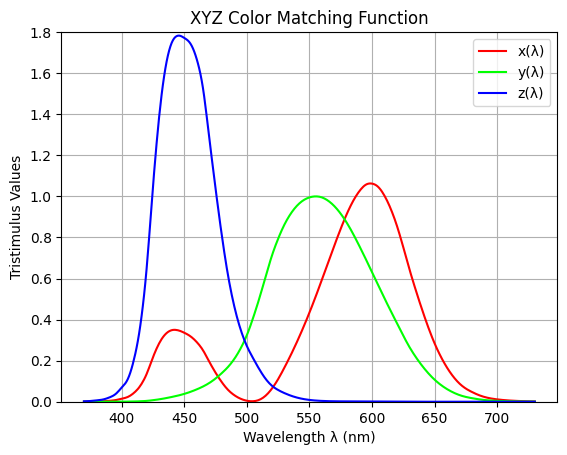

In [3]:
import matplotlib.pyplot as plt

wavelength = []  # λ in nm
x_curve = []
y_curve = []
z_curve = []

with open("cieXYZ_curves.csv", "r") as f:
            for line_no, line in enumerate(f.readlines()):
                if line_no == 0:
                    continue

                fields = line.strip().split(",")
                if len(fields) != 4:
                    print(f"Skipping malformed line {line_no + 1}: {line.strip()}")
                    continue

                wavelength.append(int(fields[0]))
                x_curve.append(float(fields[1]))
                y_curve.append(float(fields[2]))
                z_curve.append(float(fields[3]))

plt.plot(wavelength, x_curve, color='r', label='x(λ)')
plt.plot(wavelength, y_curve, color='lime', label='y(λ)')
plt.plot(wavelength, z_curve, color='b', label='z(λ)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Tristimulus Values")
plt.title("XYZ Color Matching Function")
plt.ylim(0.0,1.80)
plt.grid(True)
plt.legend()
plt.show()

2) Υπολογισμός της συνάρτησης πυκνότητας φάσματος *Β(λ)* για θερμοκρασίες από 1000Κ εώς 30000Κ.

Spectrum Density graphs for three different temperatures:



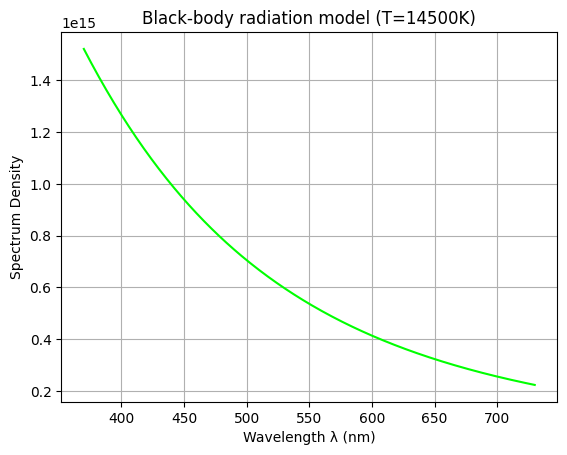

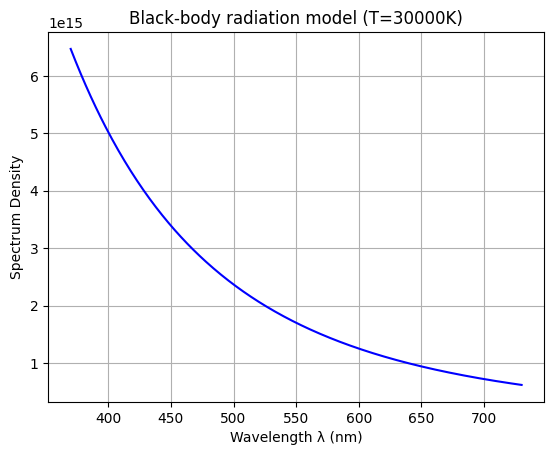

In [4]:
import numpy as np
from math import exp

b_spect = np.zeros((29001,len(wavelength)))
const_1 = 2 * 6.62606957e-34 * 299792458**2 * 1e45
const_2 = 6.62606957e-34 * 299792458 * 1e9 / 1.3806488e-23

for t_index in range(29001):
  t = 1000 + t_index
  for len_index in range(len(wavelength)):
    lamda = wavelength[len_index]
    b_spect[t_index,len_index] = const_1 / (lamda**5 * (exp(const_2/(lamda * t)) - 1))

print('Spectrum Density graphs for three different temperatures:')
print()

plt.plot(wavelength, b_spect[0,:], color='r', label='T=1000K')
plt.title('Black-body radiation model (T=1000K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.yscale("log")
plt.grid(True)
plt.show()

plt.plot(wavelength, b_spect[14499,:], color='lime', label='T=14500K')
plt.title('Black-body radiation model (T=14500K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.grid(True)
plt.show()

plt.plot(wavelength, b_spect[29000,:], color='b', label='T=30000K')
plt.title('Black-body radiation model (T=30000K)')
plt.xlabel("Wavelength λ (nm)")
plt.ylabel("Spectrum Density")
plt.grid(True)
plt.show()

3) Υπολογισμός των ολοκληρωμάτων για την εύρεση τιμών απόκρισης X,Y,Z για όλες τις θερμοκρασίες Τ.

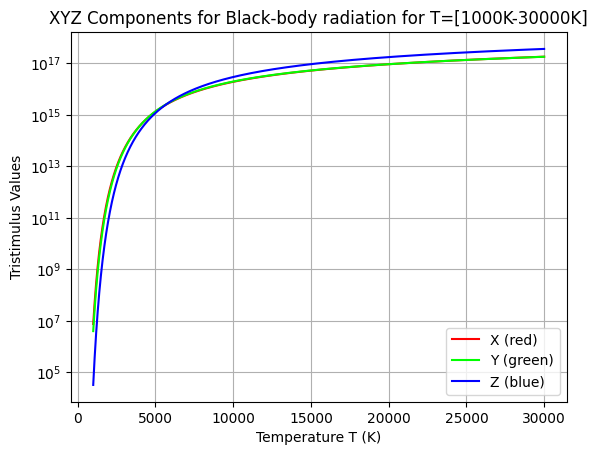

In [5]:
from scipy.integrate import trapezoid

# Για την απλοποίηση των πράξεων μπορούν να πολλαπλασιαστούν στοιχείο προς στοι-
# χείο οι πίνακες των Β(λ) και συνάρτησης χρωματικής αντιστοίχισης, αφού κατά
# τον υπολογισμό του ολοκληρώματος πολλαπλασιάζονται οι τιμές τους για το ίδιο λ.
x_times_b = np.multiply(x_curve, b_spect)
y_times_b = np.multiply(y_curve, b_spect)
z_times_b = np.multiply(z_curve, b_spect)

a_XYZ = np.zeros((29001,3))

# Λόγω του διακριτού πεδίου μήκους κύματος (άρα και του δακριτού συνόλου τιμών
# των αντίστοιχων συναρτήσεων), η τιμή των ολοκληρωμάτων δεν μπορεί να υπολογι-
# στεί ακριβώς αλλά προσεγγίζεται με τον κανόνα του τραπεζίου.
a_XYZ[:, 0] = trapezoid(x_times_b, wavelength, axis=1)
a_XYZ[:, 1] = trapezoid(y_times_b, wavelength, axis=1)
a_XYZ[:, 2] = trapezoid(z_times_b, wavelength, axis=1)

plt.plot(range(1000, 30001), a_XYZ[:, 0], color='r', label='X (red)')
plt.plot(range(1000, 30001), a_XYZ[:, 1], color='lime', label='Y (green)')
plt.plot(range(1000, 30001), a_XYZ[:, 2], color='b', label='Z (blue)')
plt.xlabel("Temperature T (K)")
plt.ylabel("Tristimulus Values")
plt.yscale("log")
plt.title("XYZ Components for Black-body radiation for T=[1000K-30000K]")
plt.grid(True)
plt.legend()
plt.show()

## **Μέρος 2**

Μετασχηματισμός αναπαράστασης χρώματος από το χρωματικό σύστημα XYZ στο επίπεδο xy και σχεδίαση τροχιάς (λευκή γραμμή) πάνω στον χρωματικό χάρτη "chromaDiagram.png".

The trace (white) of the colours on the xy plane with the change of temperature:



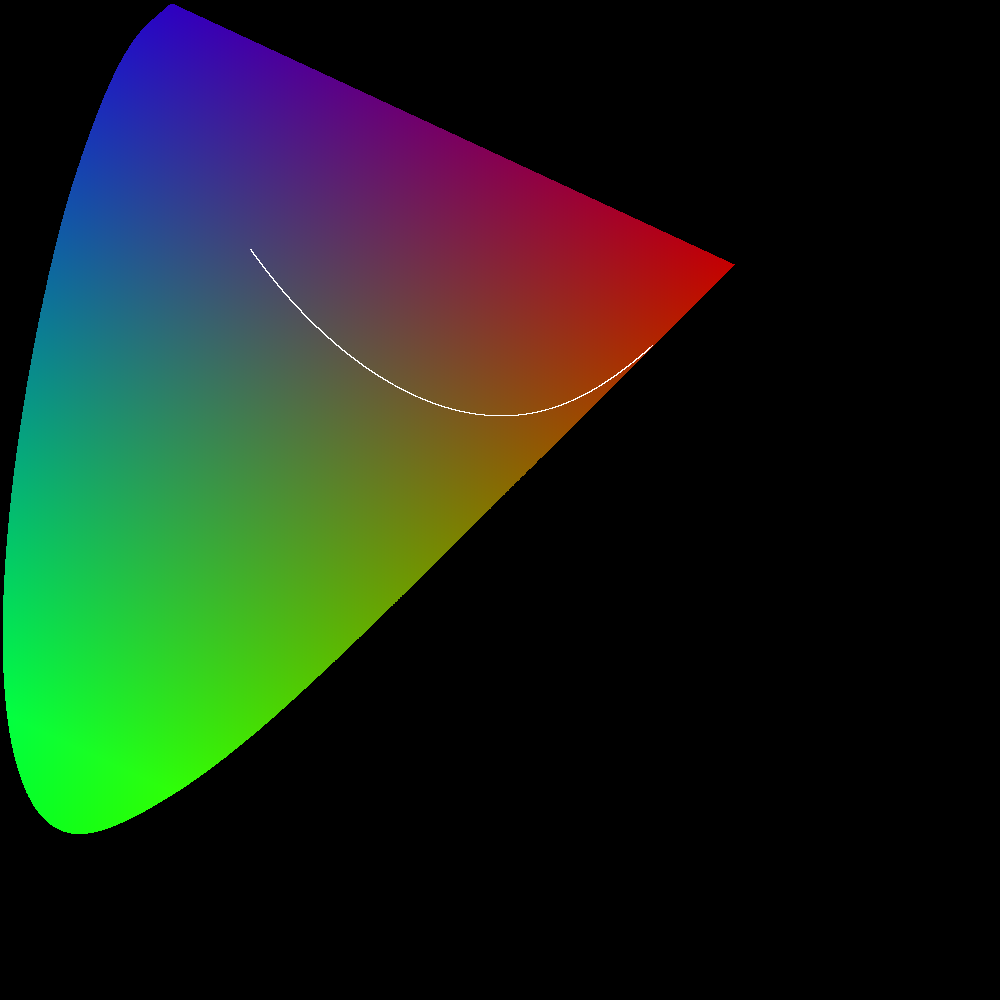

In [6]:
import cv2
from google.colab.patches import cv2_imshow

chroma_diag = cv2.imread("chromaDiagram.png")

xy_plane = np.zeros((29001,2))

xy_plane[:,0] = np.divide(a_XYZ[:, 0], (a_XYZ[:, 0] + a_XYZ[:, 1] + a_XYZ[:, 2]))
xy_plane[:,1] = np.divide(a_XYZ[:, 1], (a_XYZ[:, 0] + a_XYZ[:, 1] + a_XYZ[:, 2]))

c = np.round(1000 * xy_plane[:,0]).astype(int)
r = np.round(1000 * xy_plane[:,1]).astype(int)

for i in range(len(c)):
  chroma_diag[r[i],c[i],:] = 255

print("The trace (white) of the colours on the xy plane with the change of temperature:")
print()
cv2_imshow(chroma_diag)

## **Μέρος 3**

Demosaicing της raw εικόνας "CFA_stream.png" μέσω Green-Red Bayer Pattern, για την αναπαράσταση της στο RGB (BGR για την απεικόνιση) σύστημα.

The shape of the raw (greyscaled) image is: (1990, 823)



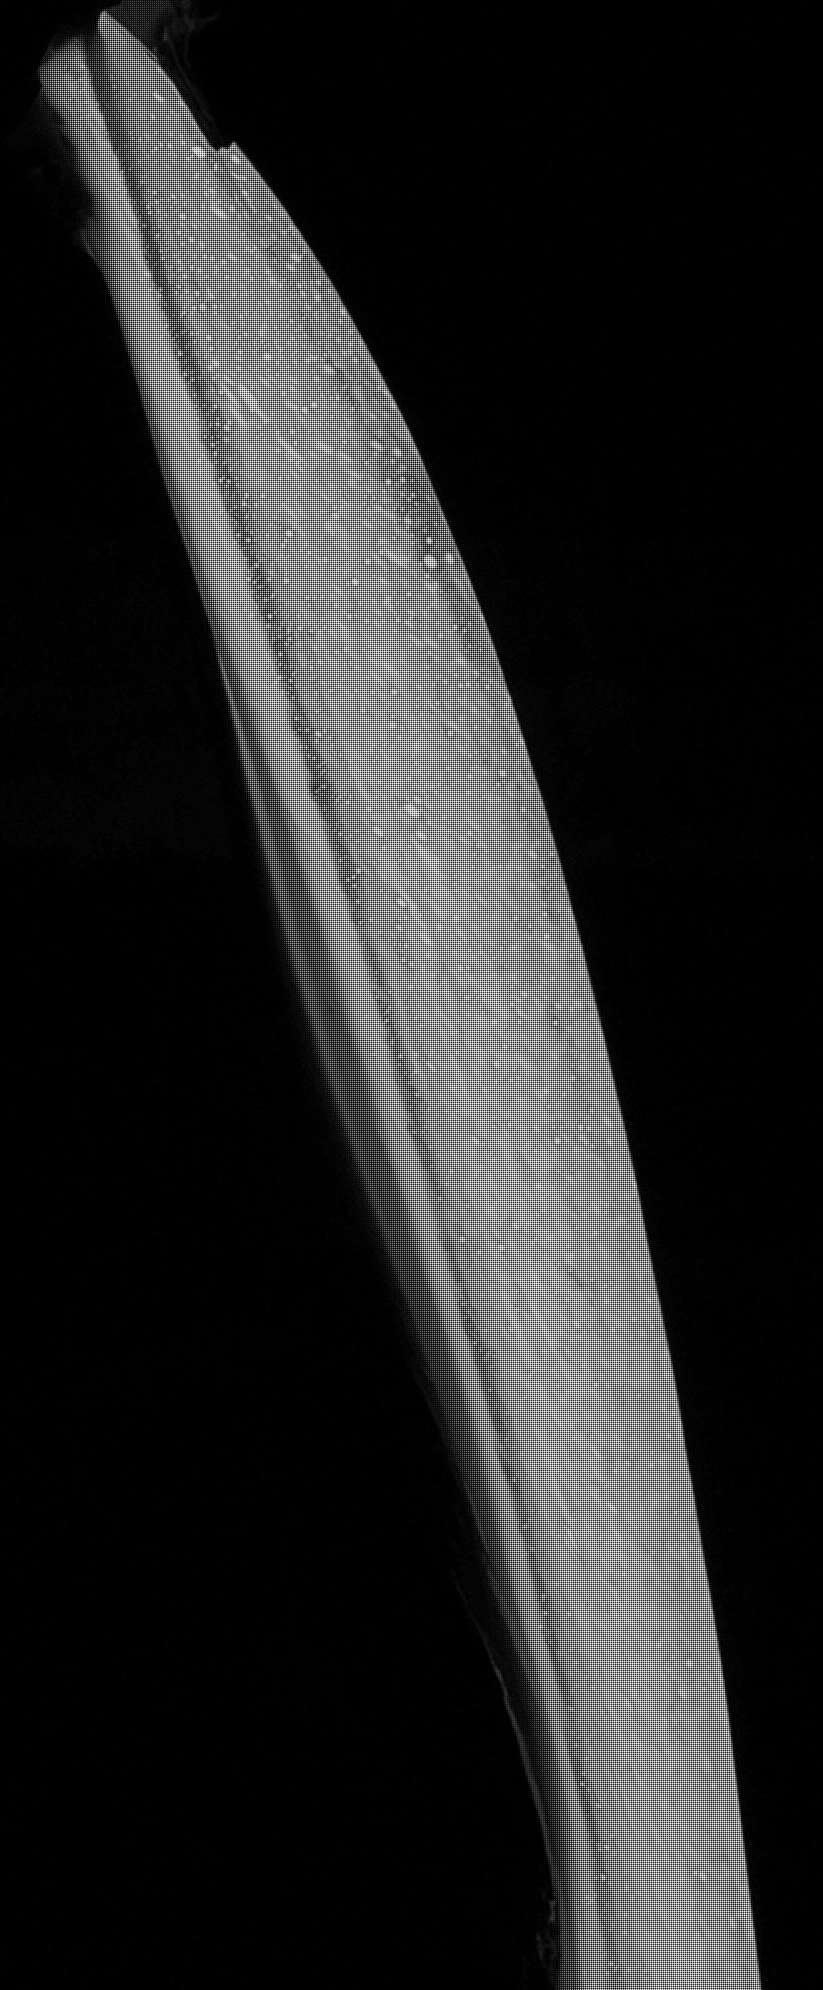


The shape of the demosaiced image is: (1990, 823, 3)



In [7]:
raw_image = cv2.imread('CFA_stream.png', cv2.IMREAD_GRAYSCALE)

print("The shape of the raw (greyscaled) image is:",raw_image.shape)
print()
cv2_imshow(raw_image)

# Πρώτα μετατροπή σε BGR για την αναπαράσταση γιατί η cv2_imshow απαιτεί BGR
# εικόνας και έπειτα μετατροπή σε RBG.
demosaiced_image = cv2.cvtColor(raw_image, cv2.COLOR_BayerGR2BGR)
print()
print("The shape of the demosaiced image is:", demosaiced_image.shape)
print()
cv2_imshow(demosaiced_image)

rgb_demosaiced_image = cv2.cvtColor(demosaiced_image, cv2.COLOR_BGR2RGB)

## **Μέρος 4**

1) Εγκατάσταση της βιβλιοθήκης Colour.

In [8]:
!pip install colour-science

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 21.8 MB/s eta 0:00:00


2) Αλλαγή εύρους τιμών της demosaiced εικόνας από 0-255 (uint8) το κάθε κανάλι σε 0.0-1.0 (float64) το κάθε κανάλι και μετατροπή χρωματικού μοντέλου από sRGB σε XYZ.

In [9]:
import colour

norm_image = rgb_demosaiced_image / 255.0

xyz_image = colour.sRGB_to_XYZ(norm_image)

## **Μέρος 5**

Δημιουργία μάσκας με κρητήριο την φωτεινότητα (3ο κανάλι V της εικόνας) και εφαρμογή μάσκας για εξαγωγή της ροής του υλικού.

The mask that will be applied is: 



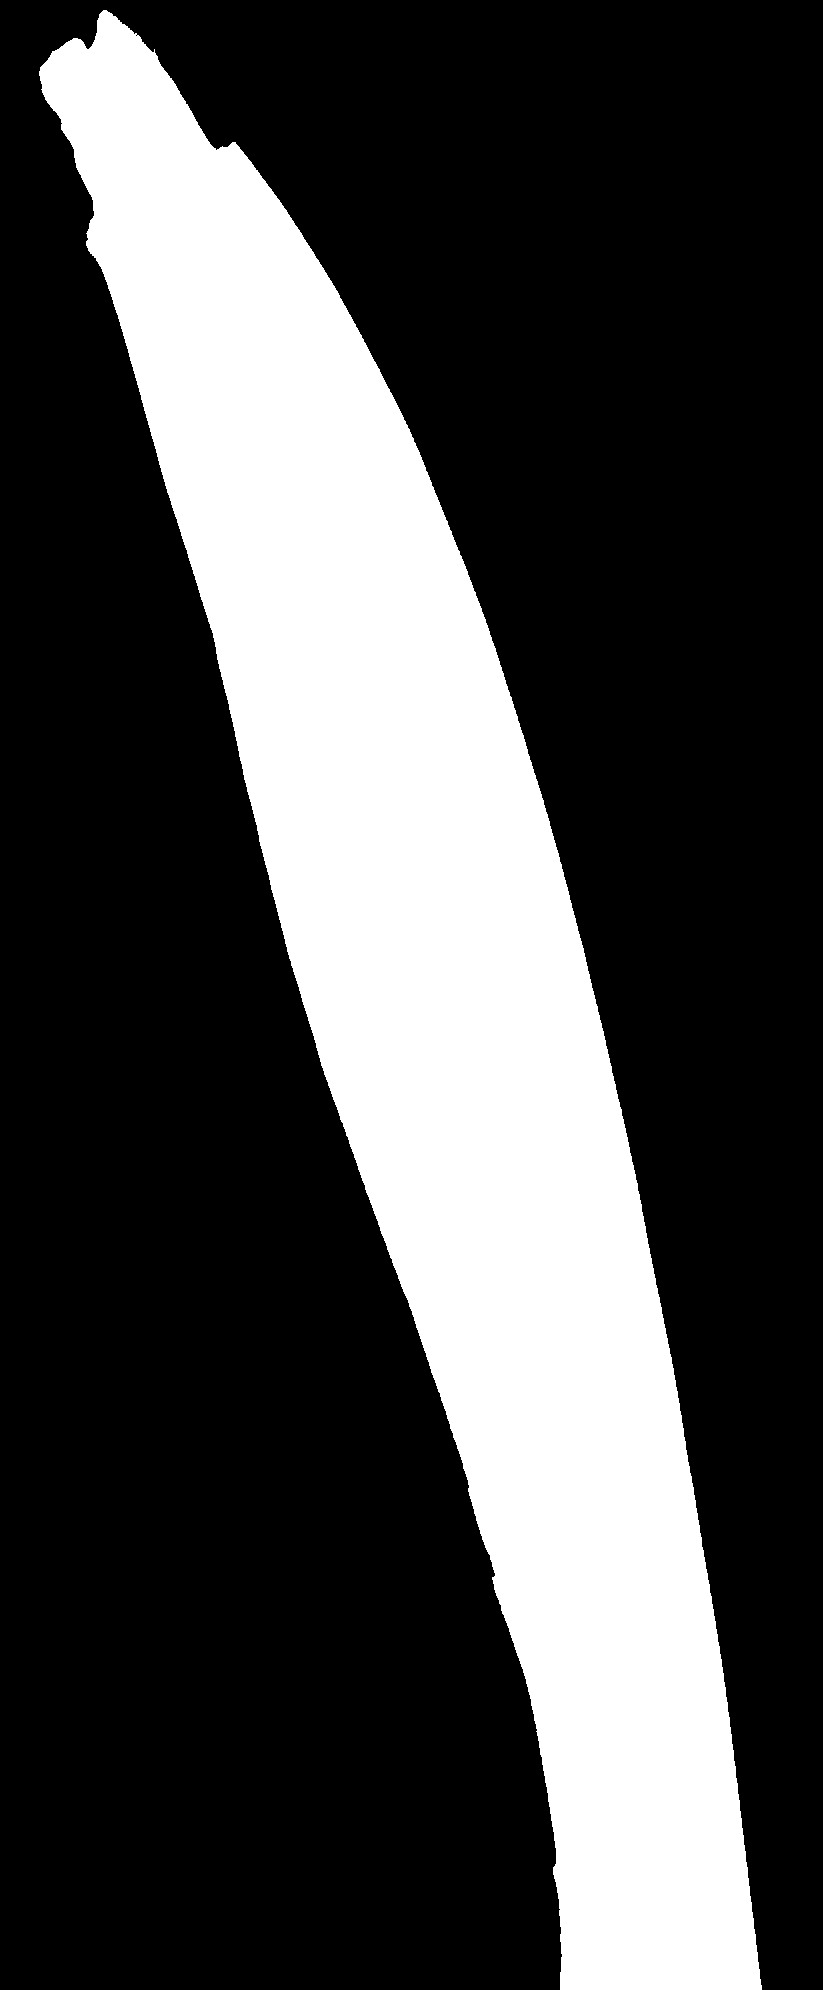


The resulting image after mask application is:



In [10]:
image_hsv = cv2.cvtColor(demosaiced_image,cv2.COLOR_BGR2HSV)

# Δεδομένου ότι το υλικό εκπέμπει ακτινοβολία (και άρα έχει φωτεινότητα) λόγω
# της υψηλής του θερμοκρασίας και δεδομένου ότι ρέει σε σκοτεινό περιβάλλον, η
# εξαγωγή της ροής του μπορεί να γίνει μέσω μίας μόνο μάσκας που δημιουργείται
# με κρητήριο την φωτεινότητα, δηλαδή την τιμή του καναλιού V, του κάθε pixel
# της εικόνας. Η τιμή V των pixel που αντιστοιχούν στο υλικό είναι αρκετά μεγάλη
# (δηλαδή το υλικό είναι αρκετά φωτεινό), ώστε μόνο αυτά να ξεπεράσουν το κατώ-
# φλι ίσο με 80.
print("The mask that will be applied is: ")
print()
mask1 = cv2.inRange(image_hsv[:,:,2],80,255)
cv2_imshow(mask1)

print()
print("The resulting image after mask application is:")
print()
flow = cv2.bitwise_and(demosaiced_image,demosaiced_image,mask=mask1)
cv2_imshow(flow)

## **Μέρος 6**

1) Εξαγωγή μόνο των pixel του υλικού (από την εικόνα στην οποία εφαρμόστηκε η μάσκα) και υπολογισμός των x και y συνιστωσών (και αντίστοιχα των c και r) για καθένα από αυτά τα σημεία.

In [11]:
gray_flow = cv2.cvtColor(flow, cv2.COLOR_BGR2GRAY)
flow_row, flow_column = np.where(gray_flow>0)

xy_values = np.zeros((len(flow_row),2))

for i in range(len(flow_row)):
  m = flow_row[i]
  n = flow_column[i]
  xy_values[i,0] = xyz_image[m,n, 0] / (xyz_image[m,n, 0] + xyz_image[m,n, 1] + xyz_image[m,n, 2])
  xy_values[i,1] = xyz_image[m,n, 1] / (xyz_image[m,n, 0] + xyz_image[m,n, 1] + xyz_image[m,n, 2])


c_values = np.round(1000 * xy_values[:,0]).astype(int)
r_values = np.round(1000 * xy_values[:,1]).astype(int)

2) Εύρεση της κοντινότερης απόστασης του κάθε σημείου [c_values,r_values] του υλικού (εικόνα "flow") από το επίπεδο xy για εκτίμηση της θερμοκρασίας.

Αυτή η εργασία μπορεί να εκτελεστεί με τους τρεις **Τρόπους Α'**, **Β'** και **Γ'**  που παρουσιάζονται παρακάτω. Ο **πρώτος** από αυτούς είναι ο πιο ορθός και ο πιο ακριβής. Όμως η τεράστια πολυπλοκότητά του έκανε αναγκαία και την εφαρμογή των δύο επιπλέον μεθόδων για την κατάληξη στα επιθυμητά αποτελέσματα σε λιγότερο/λογικό χρόνο. Η **δεύτερη** μέθοδος αποτελεί μία πιο γρήγορη έκδοση της **πρώτης**, ενώ η **τρίτη** οδηγεί στην ταχύτερη εκτέλεση από όλες τις υπόλοιπες. Η πιο γρήγορη εκτέλεση των **Τρόπων Β'** και **Γ'** επιτυγχάνεται με κόστος την ακρίβεια της εκτίμησης. Αυτή ανακρίβεια υπολογίζεται ως το απόλυτο της διαφοράς της μέσης εκτιμώμενης θερμοκρασίας του **Τρόπου Α'** πλην την μέση εκτιμώμενη θερμοκρασία του **Τρόπου Β'** ή **Γ'**.

### **ΤΡΟΠΟΣ Α': Iteration**

**Συνολικός χρόνος εκτέλεσης**: Της τάξεως των 5 ωρών.

**Πολυπλοκότητα**: Ο(m*n) (brute-force search), όπου m τα 468020 pixels του υλικού και n οι 29001 διαφορετικές θερμοκρασίες.

**Περιγραφή**: Σύγκριση της απόστασης όλων των σημείων [c_values,r_values] του υλικού με όλα τα σημεία της λευκής καμπύλης του επιπέδου xy του χρωματικού χάρτη "chromaDiagram.png", εύρεση των ελάχιστων αποστάσεων και αντιστοίχιση του κάθε σημείου [c_values,r_values] με μία θερμοκρασία μέλανος σώματος. Αν και η πιο αργή, αποτελεί την πιο ακριβή μέθοδο εκτίμησης της θερμοκρασίας από τις τρείς.

In [12]:
import math

len_c_values = len(c_values)
len_c = len(c)

temps_iteration = np.zeros(len_c_values)

print("Calculating... Please wait...")

for i in range(len_c_values):

  distances = np.zeros(len_c)

  for j in range(len_c):
    distances[j] = math.dist([r_values[i],c_values[i]],[r[j],c[j]])

  temps_iteration[i] = np.argmin(distances) + 1000

print()
print("Temperature approximation with 'Iteration' completed.")

Calculating... Please wait...

Temperature approximation with 'Iteration' completed.


### **ΤΡΟΠΟΣ Β': Faster Iteration**

**Συνολικός χρόνος εκτέλεσης**: Περίπου 33 λεπτά.

**Πολυπλοκότητα**: Ο(m*n) (brute-force search), όπου m τα 468020 pixels του υλικού και n οι 2901 διαφορετικές θερμοκρασίες.

**Περιγραφή**: Σύγκριση της απόστασης όλων των σημείων [c_values,r_values] του υλικού με όλα τα σημεία της λευκής καμπύλης του χρωματικού χάρτη του επιπέδου xy, εύρεση των ελάχιστων αποστάσεων και αντιστοίχιση του κάθε σημείου [c_values,r_values] με μία θερμοκρασία μέλανος σώματος. Σε αντίθεση με τον **Τρόπο Α'**, οι θερμοκρασίες (και κατά συνέπεια τα σημεία της καμπύλης του επιπέδου xy) δεν διατρέχονται με βήμα 1 αλλά με βήμα 10. Αυτό, αν και οδηγεί σε αρκετά ταχύτερη εκτέλεση από τον **Α'**, θα φανεί στο **Μέρος 7** (από παρατήρηση των μέσων τιμών της εκτιμώμενης θερμοκρασίας) ότι έχει την μικρότερη ακρίβεια από τις τρεις μεθόδους (αν και δεν είναι μεγάλο το σφάλμα).

In [13]:
import math

c_chopped = c[::10]
r_chopped = r[::10]

len_c_values = len(c_values)
len_c_chopped = len(c_chopped)

temps_f_iteration = np.zeros(len_c_values)

print("Calculating... Please wait...")

for i in range(len_c_values):

  distances = np.zeros(len_c_chopped)

  for j in range(len_c_chopped):
    distances[j] = math.dist([r_values[i],c_values[i]],[r_chopped[j],c_chopped[j]])

  temps_f_iteration[i] = 10 * np.argmin(distances) + 1000

print()
print("Temperature approximation with 'Faster Iteration' completed.")

Calculating... Please wait...

Temperature approximation with 'Faster Iteration' completed.


### **ΤΡΟΠΟΣ Γ': K-D Tree**

**Συνολικός χρόνος εκτέλεσης**: Πρακτικά μηδενικός.

**Πολυπλοκότητα**: Ο(m*log(n)), όπου m τα 468020 pixels του υλικού και n οι 29001 διαφορετικές θερμοκρασίες, άρα log(n)=14.824 .

**Περιγραφή**: Το δέντρο Κ-Διαστάσεων (Κ-Dimensional Tree) είναι μία μέθοδος δυαδικής αναζήτησης η οποία σε κάθε επίπεδο του δέντρου χωρίζει τον χώρο σε δύο μέρη, αξιοποιώντας για τον διαχωρισμό αυτό κάθε φορά μια διαφορετική από το προηγούμενο επίπεδο διάσταση (οι οποίες είναι πλήθους Κ). Οπότε, η μέθοδος αυτή κατασκευάζει ένα K-D Tree από τις θερμοκρασίες του xy επιπέδου και για κάθε pixel [r,c]  αναζητά από ποια θερμοκρασία του xy απέχει την ελάχιστη απόσταση. Αν και αυτός ο τρόπος αποτελεί την ταχύτερη υλοποίηση, δεν οδηγεί πάντα σε σωστές εκτιμήσεις. Παρόλα αυτά, όπως θα φανεί στο **Μέρος 7** (από παρατήρηση των μέσων τιμών της εκτιμώμενης θερμοκρασίας), ο **Τρόπος Γ'** είναι πιο ακριβής από τον **Τρόπο Β'**, το οποίο σε συνδυασμό με την ταχύτατη εκτέλεση, καθιστά το K-D Δέντρο την καλύτερη εναλλακτική του **Τρόπο Α'**.

In [21]:
from scipy.spatial import KDTree

cr_values = np.column_stack((r_values, c_values))
cr = np.column_stack((r, c))

# Κατασκευή KD Tree από τις θερμοκρασίες του xy επιπέδου
tree = KDTree(cr)

# "Εισαγωγή" των [c,r] του υλικού μέσα στο δέντρο
_, closest_temp_indices = tree.query(cr_values)

temps_KDTree = closest_temp_indices + 1000

print("Temperature approximation with KDTree completed.")

Temperature approximation with KDTree completed.


## **Μέρος 7**

### **ΑΠΟΤΕΛΕΣΜΑΤΑ ΤΡΟΠΟΥ Α': Iteration**

1) Μετατροπή εκτιμώμενης θερμοκρασίας σε βαθμούς Κελσίου, υπολογισμός μέσης τιμής και δημιουργία ιστογράμματος κατανομής εκτιμώμενης θερμοκρασίας.

Min Temperature of material: 748°C.
Max Temperature of material: 3701°C.
Mean Temperature of material: 1844.439°C.



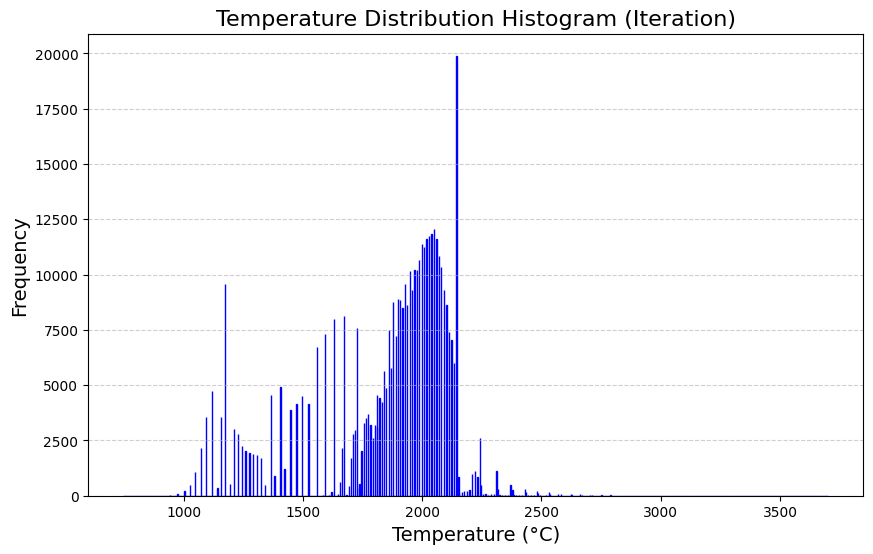

In [22]:
temps_C = (temps_iteration - 273).astype(int)

min_temp = min(temps_C)
max_temp = max(temps_C)
mean_temp = np.mean(temps_C)

print(f"Min Temperature of material: {min_temp}°C.")
print(f"Max Temperature of material: {max_temp}°C.")
print(f"Mean Temperature of material: {mean_temp:.3f}°C.")
print()

num_bins = max_temp - min_temp + 1

plt.figure(figsize=(10, 6))
plt.hist(temps_C, bins=num_bins, color='cyan', edgecolor='b')
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Temperature Distribution Histogram (Iteration)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

2) Κατασκευή πίνακα ομοίων διαστάσεων με τον "gray_flow", ο οποίος έχει NaN τιμές σε όλες τις θέσεις του. Αντικατάσταση με τις αντίστοιχες εκτιμώμενες θερμοκρασίες στις θέσεις που αντιστοιχούν στα σημεία του υλικού και κατασκευή Heat map του υλικού.

In [23]:
# Δημιουργία πίνακα όμοιου με gray_flow αλλά με NaN τιμές
heatmap = np.full_like(gray_flow, fill_value=np.nan, dtype=np.float64)

for i in range(len(flow_row)):
    m, n = flow_row[i], flow_column[i]
    heatmap[m, n] = temps_C[i]

# Αγνόησε τα NaN
heatmap_masked = np.ma.masked_invalid(heatmap)

plt.figure(figsize=(20, 12))
plt.imshow(heatmap_masked, cmap='inferno', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label(label="Temperature (°C)", fontsize=14)
cbar.ax.tick_params(labelsize = 14)
plt.title("Material Temperature Heatmap (Iteration)", fontsize=16)
plt.axis("off")
plt.show()

### **ΑΠΟΤΕΛΕΣΜΑΤΑ ΤΡΟΠΟΥ Β': Faster Iteration**

1) Μετατροπή εκτιμώμενης θερμοκρασίας σε βαθμούς Κελσίου, υπολογισμός μέσης τιμής και δημιουργία ιστογράμματος κατανομής εκτιμώμενης θερμοκρασίας.

Min Temperature of material: 727°C.
Max Temperature of material: 3667°C.
Mean Temperature of material: 1850.322°C.



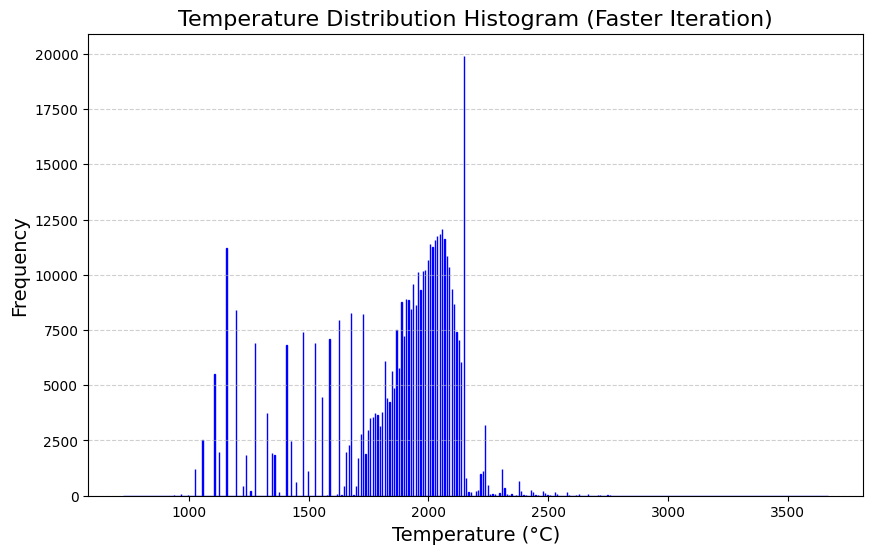

In [24]:
temps_C = (temps_f_iteration - 273).astype(int)

min_temp = min(temps_C)
max_temp = max(temps_C)
mean_temp = np.mean(temps_C)

print(f"Min Temperature of material: {min_temp}°C.")
print(f"Max Temperature of material: {max_temp}°C.")
print(f"Mean Temperature of material: {mean_temp:.3f}°C.")
print()

num_bins = max_temp - min_temp + 1

plt.figure(figsize=(10, 6))
plt.hist(temps_C, bins=num_bins, color='cyan', edgecolor='b')
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Temperature Distribution Histogram (Faster Iteration)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

2) Κατασκευή πίνακα ομοίων διαστάσεων με τον "gray_flow", ο οποίος έχει NaN τιμές σε όλες τις θέσεις του. Αντικατάσταση με τις αντίστοιχες εκτιμώμενες θερμοκρασίες στις θέσεις που αντιστοιχούν στα σημεία του υλικού και κατασκευή Heat map του υλικού.

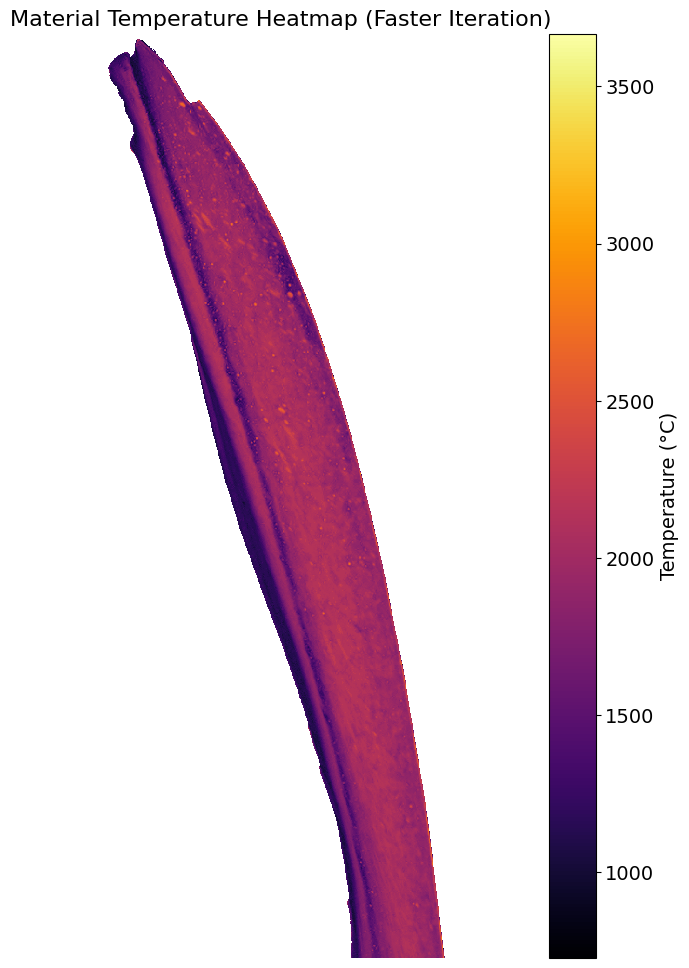

In [25]:
# Δημιουργία πίνακα όμοιου με gray_flow αλλά με NaN τιμές
heatmap = np.full_like(gray_flow, fill_value=np.nan, dtype=np.float64)

for i in range(len(flow_row)):
    m, n = flow_row[i], flow_column[i]
    heatmap[m, n] = temps_C[i]

# Αγνόησε τα NaN
heatmap_masked = np.ma.masked_invalid(heatmap)

plt.figure(figsize=(20, 12))
plt.imshow(heatmap_masked, cmap='inferno', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label(label="Temperature (°C)", fontsize=14)
cbar.ax.tick_params(labelsize = 14)
plt.title("Material Temperature Heatmap (Faster Iteration)", fontsize=16)
plt.axis("off")
plt.show()

### **ΑΠΟΤΕΛΕΣΜΑΤΑ ΤΡΟΠΟΥ Γ': K-D Tree**

1) Μετατροπή εκτιμώμενης θερμοκρασίας σε βαθμούς Κελσίου, υπολογισμός μέσης τιμής και δημιουργία ιστογράμματος κατανομής εκτιμώμενης θερμοκρασίας.

Min Temperature of material: 748°C.
Max Temperature of material: 3702°C.
Mean Temperature of material: 1848.627°C.



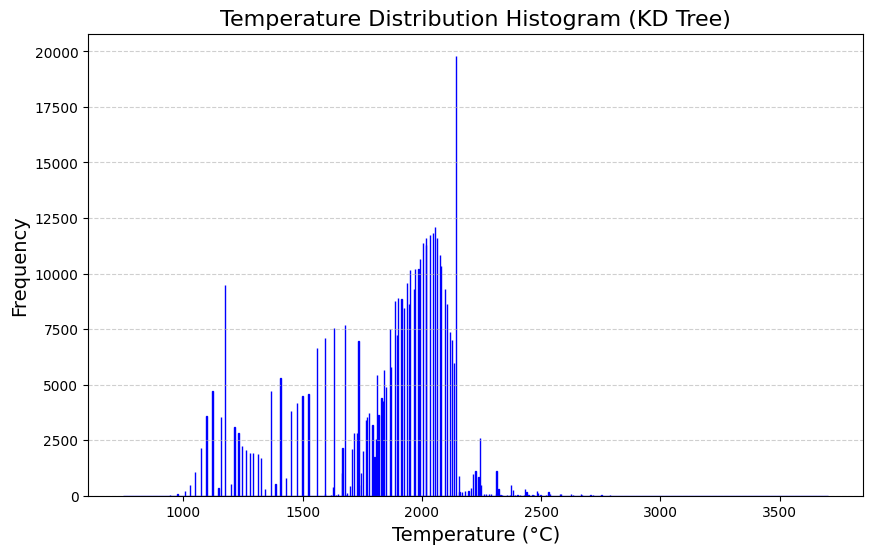

In [26]:
temps_C = temps_KDTree - 273

min_temp = min(temps_C)
max_temp = max(temps_C)
mean_temp = np.mean(temps_C)

print(f"Min Temperature of material: {min_temp}°C.")
print(f"Max Temperature of material: {max_temp}°C.")
print(f"Mean Temperature of material: {mean_temp:.3f}°C.")
print()

num_bins = max_temp - min_temp + 1

plt.figure(figsize=(10, 6))
plt.hist(temps_C, bins=num_bins, color='cyan', edgecolor='b')
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Temperature Distribution Histogram (KD Tree)", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

2) Κατασκευή πίνακα ομοίων διαστάσεων με τον "gray_flow", ο οποίος έχει NaN τιμές σε όλες τις θέσεις του. Αντικατάσταση με τις αντίστοιχες εκτιμώμενες θερμοκρασίες στις θέσεις που αντιστοιχούν στα σημεία του υλικού και κατασκευή Heat map του υλικού.

In [27]:
# Δημιουργία πίνακα όμοιου με gray_flow αλλά με NaN τιμές
heatmap = np.full_like(gray_flow, fill_value=np.nan, dtype=np.float64)

for i in range(len(flow_row)):
    m, n = flow_row[i], flow_column[i]
    heatmap[m, n] = temps_C[i]

# Αγνόησε τα NaN
heatmap_masked = np.ma.masked_invalid(heatmap)

plt.figure(figsize=(20, 12))
plt.imshow(heatmap_masked, cmap='inferno', interpolation='nearest')
cbar = plt.colorbar()
cbar.set_label(label="Temperature (°C)", fontsize=14)
cbar.ax.tick_params(labelsize = 14)
plt.title("Material Temperature Heatmap (KD Tree)", fontsize=16)
plt.axis("off")
plt.show()